In [11]:
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython import display
from IPython.display import HTML


#variable declaration

nx = 41
ny = 41
nt = 300
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny,nx))
v = np.ones((ny,nx))
un = np.ones((ny,nx))
vn = np.ones((ny,nx))

#Initial Conditions
u[int(0.5/dy): int(1/dy + 1) ,int(0.5/dx): int(1/dx + 1)] = 2
v[int(0.5/dy): int(1/dy + 1) ,int(0.5/dx): int(1/dx + 1)] = 2

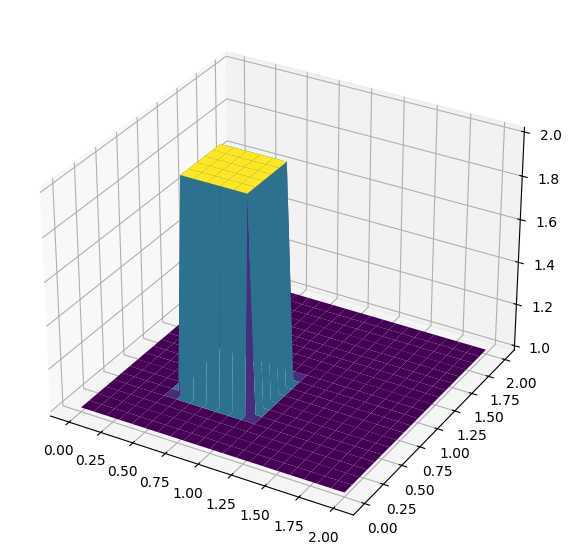

In [12]:
fig = plt.figure(figsize = (11,7) , dpi = 100)
ax = fig.add_subplot(projection = '3d')
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y, u[:], cmap = cm.viridis, rstride = 2, cstride = 2)

In [13]:
fig = plt.figure(figsize = (11,7), dpi = 100)
ax = fig.add_subplot(111, projection = '3d')
X, Y = np.meshgrid(x,y)
line = ax.plot_surface(X,Y, u[:])

def animateu(frame):
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
     
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    ax.clear()
    ax.axes.set_zlim3d(bottom=1, top=2)
    line = ax.plot_surface(X,Y,u[:], cmap = cm.viridis)
    line = ax.plot_surface(X, Y, v[:], cmap=cm.viridis)
    return line,

anim = FuncAnimation(fig, animateu, frames = nt+1, interval = 20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()